## Imports

In [356]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Preprocessing

In [4]:
root = 'C:\\Users\\Krishna\\IIT MADRAS\\Molecular Data Science and Informatics\\Quiz\\polymer.data'

In [30]:
with open(root) as f:
    string = f.readlines()

In [274]:
Data = []
for i in range(len(string)):
    if string[i] == 'ITEM: ATOMS id mol type xu yu zu vx vy vz \n':
        for k in range(i+1,i+101):
            lst = string[k].split(' ')
            lst = lst[3:-1]
            lst = [float(i) for i in lst]
            Data.append(lst)

## Autoencoder

In [206]:
for i in range(12060):
    data = np.array(Data[i]).flatten().reshape(600,1)
    minmax = MinMaxScaler()
    data_scaled = minmax.fit_transform(data)
    Data[i] = data_scaled.reshape((600,))
Data = np.array(Data)

In [269]:
n_cols = Data.shape[1]

model = Sequential()
enc_1 = Dense(200, activation='relu', input_shape = (n_cols,))
model.add(enc_1)
enc_2 = Dense(100, activation='relu')
model.add(enc_2)
enc_3 = Dense(50, activation='relu')
model.add(enc_3)
bottle_neck = Dense(2, activation='relu', name='bottleneck')
model.add(bottle_neck)
dec_1 = Dense(50, activation='relu')
model.add(dec_1)
dec_2 = Dense(100, activation='relu')
model.add(dec_2)
dec_3 = Dense(200, activation='relu')
model.add(dec_3)
dec_4 = Dense(n_cols, activation='relu')
model.add(dec_4)

lr = 1e-2
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error')

autoencoder = model.fit(Data, Data, epochs=50, verbose=1, validation_split=0.01)

Epoch 1/50
374/374 [==============================] - 4s 7ms/step - loss: 0.0833 - val_loss: 0.0663
Epoch 2/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0638 - val_loss: 0.0539
Epoch 3/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0599 - val_loss: 0.0521
Epoch 4/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0580 - val_loss: 0.0479
Epoch 5/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0550 - val_loss: 0.0473
Epoch 6/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0534 - val_loss: 0.0459
Epoch 7/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0515 - val_loss: 0.0417
Epoch 8/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0486 - val_loss: 0.0418
Epoch 9/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0484 - val_loss: 0.0417
Epoch 10/50
374/374 [==============================] - 2s 6ms/step - loss: 0.0484 - val_loss: 0.0416

In [270]:
bottleneck_output = model.get_layer('bottleneck').output
model_bottleneck = Model(inputs = model.input, outputs = bottleneck_output)

bottleneck_predictions = model_bottleneck.predict(Data)

377/377 [==============================] - 1s 2ms/step


In [271]:
bottleneck_predictions

array([[ 1.0543066,  0.       ],
       [ 0.8710748,  0.       ],
       [ 1.0398799,  0.       ],
       ...,
       [18.479176 ,  0.       ],
       [18.487247 ,  0.       ],
       [18.49231  ,  0.       ]], dtype=float32)

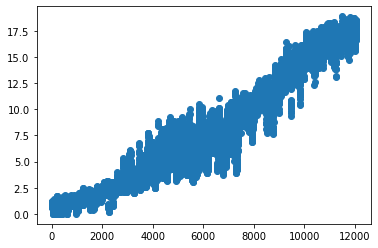

In [357]:
x = list(range(12060))
plt.scatter(x, bottleneck_predictions[:,0],)

## PCA

In [299]:
Data = []
for i in range(len(string)):
    if string[i] == 'ITEM: ATOMS id mol type xu yu zu vx vy vz \n':
        for k in range(i+1,i+101):
            lst = string[k].split(' ')
            lst = lst[3:-1]
            lst = [float(i) for i in lst]
            Data.append(lst)

In [305]:
sc = StandardScaler()
Data_scaled = sc.fit_transform(Data)

In [358]:
pca = PCA(n_components = 4)
pca.fit(Data_scaled)

PCA(n_components=4)

In [359]:
pca.components_.shape

(4, 6)

In [331]:
pca.explained_variance_ratio_.cumsum()

array([0.37844729, 0.54545882, 0.71221884])

In [346]:
mat = pca.transform(Data_scaled)

## K-means

In [360]:
clusters = list(range(2,10))
error = []
for i in clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mat)
    error.append(kmeans.inertia_)

In [354]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mat)
lb=kmeans.labels_

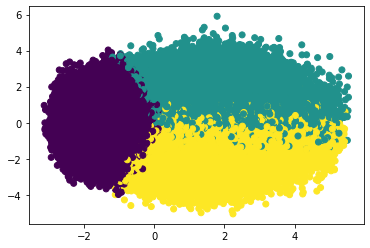

In [355]:
plt.scatter(mat[:,0], mat[:,1],c=lb)
plt.save

<AxesSubplot: >

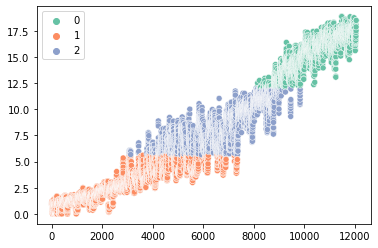

In [345]:
sns.scatterplot(x = list(range(12060)), y = bottleneck_predictions[:,0], hue = kmeans.labels_, palette = "Set2")

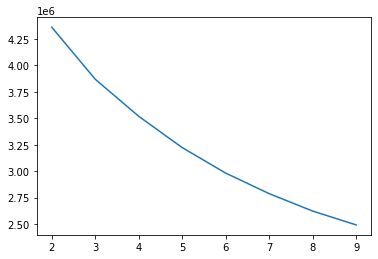

In [361]:
plt.plot(clusters, error)